# <center> Trocatine 🐰 </center>
### <center> Teste A/B </center>

### Importações

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import pickle

### Variáveis

In [34]:
modelos_before = pickle.load(open('./modelos_before.pk1','rb'))
modelos_after = pickle.load(open('./modelos_after.pk1','rb'))

In [35]:
# Leitura do teste A
teste_b = modelos_before['tree'][0]['F1s']

# Leitura do teste B 
teste_a = modelos_after['knn']['media_score_etapa']

In [36]:
significancia = 0.05
confianca = 0.95
tcritico = 1.697 # Tirado da tabela

## 1. Teste 

### Intervalo de confiança

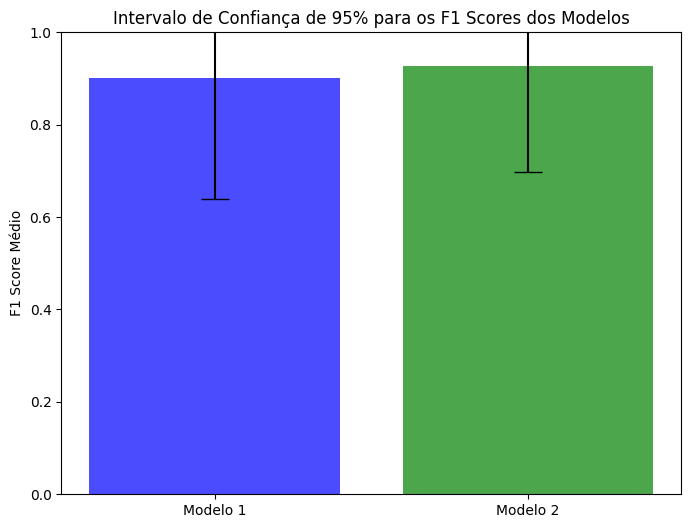

In [37]:
# Calculando as médias
media_A = np.mean(teste_a)
media_B = np.mean(teste_b)

# Calculando erro padrão para intervalos de confiança
erro_padrao_A = np.sqrt((media_A * (1 - media_A)) / len(teste_a))
erro_padrao_B = np.sqrt((media_B * (1 - media_B)) / len(teste_b))

# Intervalos de confiança de 95%
intervalo_A = norm.interval(confianca, loc=media_A, scale=erro_padrao_A)
intervalo_B = norm.interval(confianca, loc=media_B, scale=erro_padrao_B)

# Configurando o gráfico
labels = ['Modelo 1', 'Modelo 2']
medias = [media_A, media_B]
erros = [(intervalo_A[1] - media_A), (intervalo_B[1] - media_B)]  # Metade da amplitude dos ICs

# Criando o gráfico de barras com intervalos de confiança
plt.figure(figsize=(8, 6))
plt.bar(labels, medias, yerr=erros, capsize=10, color=['blue', 'green'], alpha=0.7)
plt.ylabel('F1 Score Médio')
plt.title('Intervalo de Confiança de 95% para os F1 Scores dos Modelos')
plt.ylim(0, 1)  # Opcional, ajuste o eixo Y conforme necessário

# Exibindo o gráfico
plt.show()

### Teste T

In [38]:
# Realizar o teste t
t_stat, p_valor = stats.ttest_ind(teste_b, teste_a)

print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_valor}')

if p_valor < significancia:
    print("A diferença é estatisticamente significativa, o que nos permite rejeitar a hipótese nula.")
else:
    print("A diferença não é estatisticamente significativa, portanto, não podemos rejeitar a hipótese nula.")

Estatística t: 2.8816459706192292
Valor p: 0.02045977843459418
A diferença é estatisticamente significativa. Podemos rejeitar a hipótese nula.


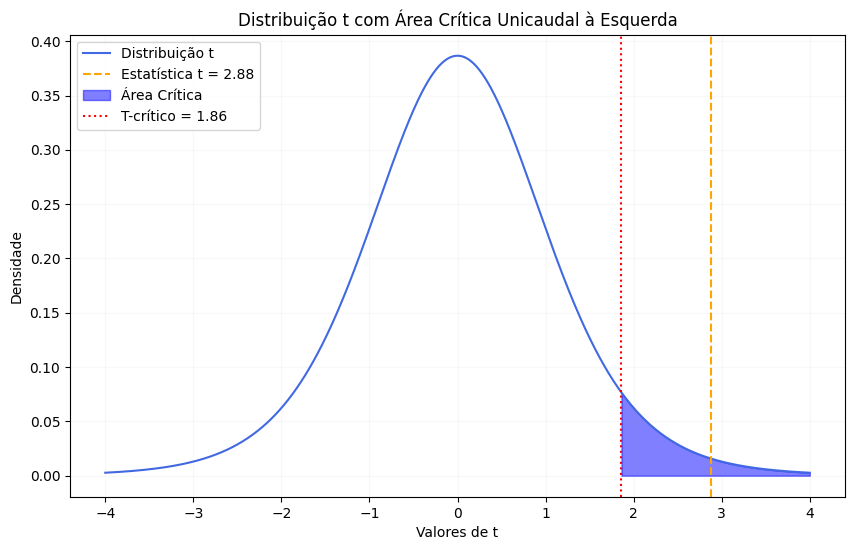

In [39]:
# Definir o número de graus de liberdade
df = len(teste_a) + len(teste_b) - 2

# Definir o valor crítico t para o nível de significância (unilateral à esquerda)
t_critical = stats.t.ppf(1 - significancia, df)

# Criando os valores para a distribuição t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t', color='royalblue')
plt.axvline(t_stat, color='orange', linestyle='--', label=f'Estatística t = {t_stat:.2f}')
plt.fill_between(x, 0, y, where=(x >= t_critical), color='blue', alpha=0.5, label=f'Área Crítica')
plt.axvline(t_critical, color='red', linestyle=':', label=f'T-crítico = {t_critical:.2f}')

# Personalização do gráfico
plt.title('Distribuição t com Área Crítica Unicaudal à Esquerda')
plt.xlabel('Valores de t')
plt.ylabel('Densidade')
plt.legend(loc='upper left')

# Diminuindo a opacidade da grade
plt.grid(True, alpha=0.08)

# Exibir o gráfico
plt.show()

C:\Users\sarahbatista-ieg\AppData\Local\Temp\ipykernel_23088\4144249306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Modelo', y='Performace', data=dois, palette="Set2")


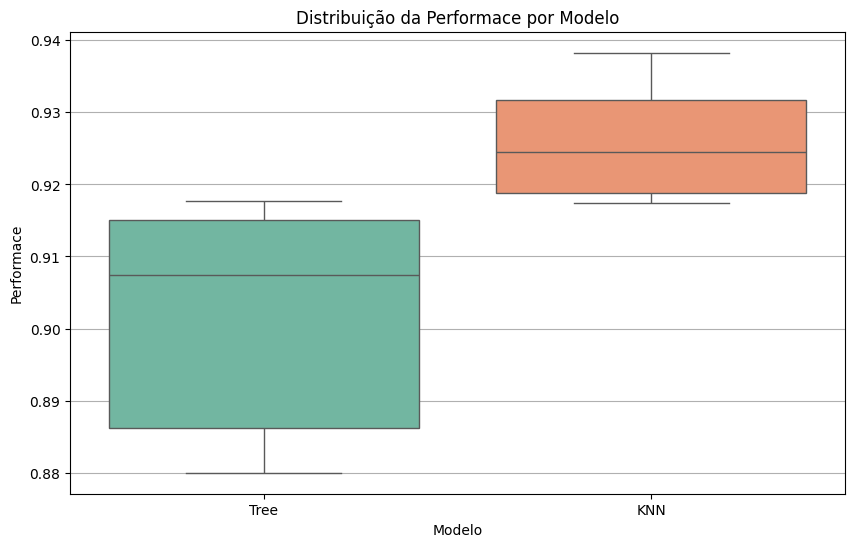

In [40]:
dois = pd.DataFrame({
    'Performace': teste_a + teste_b,
    'Modelo': ['Tree'] * len(teste_a) + ['KNN'] * len(teste_b)
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='Performace', data=dois, palette="Set2")
plt.title('Distribuição da Performace por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Performace')
plt.grid(axis='y')